In [25]:
from transformers import AutoTokenizer, AutoModel 
import torch
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
sbert_tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/bert-base-nli-cls-token")
sbert_model = AutoModel.from_pretrained("sentence-transformers/bert-base-nli-cls-token")

 <font size="4">(1) Get token embeddings before mean-pooling</font>

In [114]:
sentences = [" young cat walks fast ", "kitten runs"]

In [115]:
sbert_encoded_inputs = sbert_tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
#for ids in sbert_encoded_inputs["input_ids"]:
    #print(ids, sbert_tokenizer.decode(ids))
with torch.no_grad():
    sbert_output = sbert_model(**sbert_encoded_inputs)
sbert_pairwise_similarities=cosine_similarity(sbert_output[0][0],sbert_output[0][1]) 

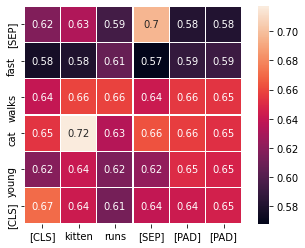

In [116]:
labels = [sbert_tokenizer.decode(ids) for ids in sbert_encoded_inputs["input_ids"] ]
y_labels = labels[0].split()   
x_labels = labels[1].split()
#print(y_lables, "\n", x_labels)
#f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(sbert_pairwise_similarities, xticklabels=x_labels, yticklabels=y_labels, annot = True, square=True, linewidths=0.2)
ax.invert_yaxis()

<font size=4>(2) Compute sentence embeddings manually</font>

In [117]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

encoded_input = sbert_tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')

with torch.no_grad():
    model_output = sbert_model(**encoded_input)

#Perform mean pooling
sentence_embeddings1 = mean_pooling(model_output, encoded_input['attention_mask'])

pairwise_similarities=cosine_similarity(sentence_embeddings1)
print(pairwise_similarities)

[[0.99999994 0.69492054]
 [0.69492054 1.0000002 ]]


<font size=4>(3) Compute sentence embeddings</font>

In [118]:
encoded_input = sbert_tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')


with torch.no_grad():
    model_output = sbert_model(**encoded_input)
    sentence_embeddings2 = model_output[0][:,0] 
print("Sentence embeddings:","\n", sentence_embeddings2)

pairwise_similarities=cosine_similarity(sentence_embeddings2)
print(pairwise_similarities)

Sentence embeddings: 
 tensor([[-0.9378, -0.2172,  0.4446,  ...,  0.0746,  0.5075,  0.0471],
        [-0.4368,  0.2615,  0.1175,  ..., -0.5179,  0.7768,  0.3949]])
[[1.        0.6705172]
 [0.6705172 1.0000001]]


In [77]:
input_ids = torch.tensor(sbert_tokenizer.encode("a young cat walk")).unsqueeze(0)  
outputs = sbert_model(input_ids)
last_hidden_states = outputs[0]
sen1=last_hidden_states.squeeze().detach().numpy()

In [78]:
input_ids2 = torch.tensor(sbert_tokenizer.encode("the kitten run")).unsqueeze(0) 
outputs = sbert_model(input_ids2)
last_hidden_states2 = outputs[0]
sen2=last_hidden_states2.squeeze().detach().numpy()

In [83]:
sim=cosine_similarity(sen1,sen2)

In [81]:
print(sim)
# ax = sns.heatmap(sim, xticklabels=x_labels, yticklabels=y_labels, annot = True)#, square=True, linewidths=0.2)
# ax.invert_yaxis()

[[0.63218147 0.61777115 0.6221095  0.5915283  0.6556504 ]
 [0.59668976 0.64737713 0.60321677 0.5854978  0.6394553 ]
 [0.5816658  0.62326574 0.6195542  0.5826143  0.6347308 ]
 [0.6032076  0.62369555 0.67496824 0.60255754 0.65151846]
 [0.58893365 0.60928476 0.6193613  0.6187098  0.63677824]
 [0.56818557 0.58466417 0.59055495 0.55695105 0.6632825 ]]
